# Astrophysik 2

### Group participants
- Stephan Broda
- Josef Pfusterer
- Patrick Fodor

## Aufgabe A
Galaxienmorphologie in Haufen bei unterschiedlicher Rotverschiebung (Fasano et al. 2000, ApJ, 542, S. 673): In der Tabelle fasano2000 tab1.dat finden
Sie u.a. die Abell-Nummern und Rotverschiebungen von 9 Galaxienhaufen. In der Tabelle fasano2000 tab2.dat sind die Morphologien von Galaxien in
diesen Haufen eingetragen. Bestimmen Sie den Anteil von S0-Galaxien in jedem der Haufen und erzeugen Sie eine Grafik, die den S0-Anteil als Funk-
tion der Rotverschiebung zeigt. Wie würden Sie die beobachtete Entwicklung erklären?
Anmerkung: Verwenden Sie bei Ihrer Statistik alle S0-Galaxien, auch solche, deren Klassifikation unsicher war (E/S0, S0?, S0/a, S0/E).

## Import Python dependencies

In [1]:
import math
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# import seaborn as sns
# plt.style.use('ggplot')
# sns.set_style("whitegrid", {'axes.grid' : False})
# matplotlib.rc('animation', html='html5')
FIGSIZE = (16, 6)

# output all statements
from IPython.core.interactiveshell import InteractiveShell
from IPython.display import Image
InteractiveShell.ast_node_interactivity = "last"


ROOT = os.path.dirname('./')

fasano2000_tab1 = os.path.join(ROOT, "fasano2000_tab1.dat.txt")
fasano2000_tab2 = os.path.join(ROOT, "fasano2000_tab2.dat.txt")
fdf = os.path.join(ROOT, "fdf.dat.txt")


%matplotlib inline


## Read all data files and combine into 1 data table

Combine "fasano2000_tab1.dat" and "fasano2000_tab2.dat"

In [2]:
df_tab1 = pd.read_csv(fasano2000_tab1,
                      sep="\s+",
                      skiprows=2,
                      skipfooter=1,
                      usecols=[0, 1],
                      names=['Abel', 'z'])

df_tab2 = pd.read_csv(fasano2000_tab2,
                      sep="\s+",
                      skiprows=2,
                      skipfooter=1,
                      usecols=[0, 1, 4],
                      names=['Abel', 'Ga', 'Mtype'])

merged_df = df_tab1.merge(df_tab2, left_on='Abel', right_on='Abel')

merged_df["S0_suspect"] = merged_df.Mtype.str.contains("S0")
merged_df["S0"] = merged_df.Mtype == "S0"

merged_s0_suspect_df = merged_df[merged_df["S0_suspect"]==True]
merged_s0_df = merged_df[merged_df["S0"]==True]

c:\tools\anaconda3\envs\astero\lib\site-packages\ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  
c:\tools\anaconda3\envs\astero\lib\site-packages\ipykernel_launcher.py:13: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  del sys.path[0]


In [3]:
print("Table 1")
print(df_tab1.head())

Table 1
   Abel      z
0  3330  0.091
1   389  0.116
2   951  0.143
3  2658  0.185
4  2192  0.187


In [4]:
print("Table 2")
print(df_tab2.head())

Table 2
   Abel  Ga Mtype
0  3330   1    E?
1  3330   2    Sb
2  3330   3     E
3  3330   4    Sc
4  3330   5     E


In [5]:
print("Merged Table 1 and Table 2")
print(merged_df.head())

Merged Table 1 and Table 2
   Abel      z  Ga Mtype  S0_suspect     S0
0  3330  0.091   1    E?       False  False
1  3330  0.091   2    Sb       False  False
2  3330  0.091   3     E       False  False
3  3330  0.091   4    Sc       False  False
4  3330  0.091   5     E       False  False


In [6]:
# get total number of s0 suspects:
total_S0_suspects_count = merged_s0_suspect_df["S0_suspect"].count()  # 138
total_S0_count = merged_s0_df["S0"].count()

In [7]:
# get count of s0 suspect galaxies by redshift
_s0_suspect_by_redshift_counts = merged_s0_suspect_df.groupby(by="z")["S0_suspect"].count()
_s0_by_redshift_counts = merged_s0_df.groupby(by="z")["S0"].count()

In [8]:
# get ratio
_s0_suspect_by_redshift_ratios = _s0_suspect_by_redshift_counts / total_S0_suspects_count
_s0_by_redshift_ratios = _s0_by_redshift_counts / total_S0_count
print(_s0_suspect_by_redshift_ratios)
print(_s0_suspect_by_redshift_ratios)

z
0.091    0.137681
0.116    0.137681
0.143    0.086957
0.185    0.050725
0.187    0.144928
0.198    0.144928
0.229    0.130435
0.248    0.101449
0.254    0.065217
Name: S0_suspect, dtype: float64
z
0.091    0.137681
0.116    0.137681
0.143    0.086957
0.185    0.050725
0.187    0.144928
0.198    0.144928
0.229    0.130435
0.248    0.101449
0.254    0.065217
Name: S0_suspect, dtype: float64


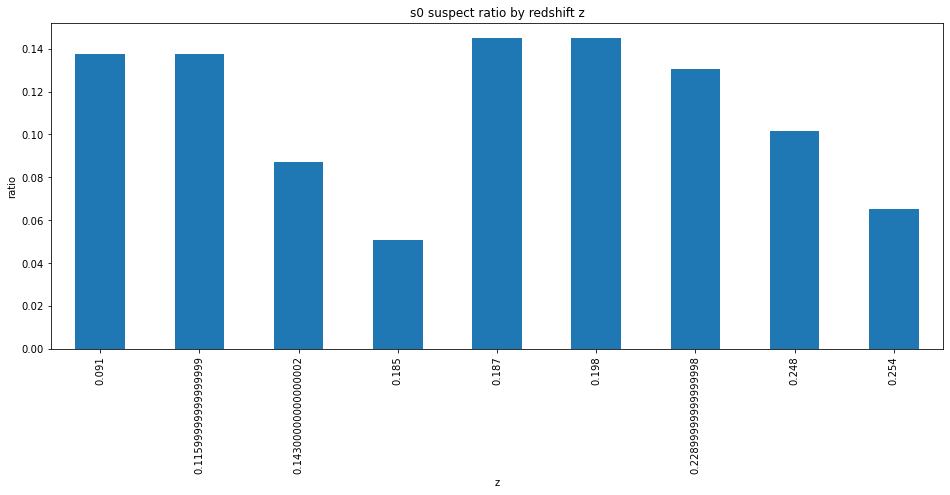

In [9]:
_s0_suspect_by_redshift_ratios.plot.bar(figsize=(16, 6), title="s0 suspect ratio by redshift z")
plt.ylabel("ratio")
plt.show()

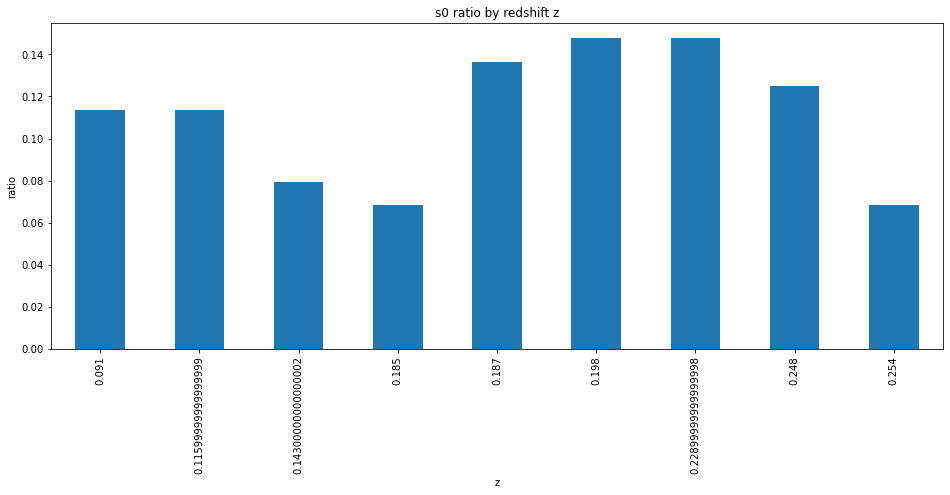

In [10]:
_s0_by_redshift_ratios.plot.bar(figsize=(16, 6), title="s0 ratio by redshift z")
plt.ylabel("ratio")
plt.show()

###  Kommentar
Die zwei Peaks können wir nicht erklären

## Aufgabe B
Farben von Galaxien im Feld, also in Regionen niedriger Galaxienanzahldichte, bei verschiedenen Rotverschiebungen (Heidt et al. 2003, A&A, 398, S. 49):
Diese Daten stammen aus dem FORS DEEP Field Survey (FDF). In der Tabelle fdf.dat finden Sie die (photometrischen) Rotverschiebungen, scheinbaren Helligkeiten im B- und R-Band und die Absoluthelligkeiten MB von Feldgalaxien bis zu einer Rotverschiebung von z = 1. Berechnen Sie die Farbe B − R aller Galaxien und tragen Sie diese gegen die Absoluthelligkeit
MB in drei Rotverschiebungsbereichen auf: z < 0.4, 0.4 < z < 0.7 und 0.7 < z < 1.0. Welche Anderungen in diesen Farben-Helligkeits-Diagrammen sehen Sie von niedriger zu hoher Rotverschiebung und wie würden Sie diese Anderungen erklären?
Anmerkung: Die scheinbaren Helligkeiten B und R sind nicht k-korrigiert, d.h. der Einfluss der Rotverschiebung auf die Farbe B − R ist nicht herausgerechnet; dies sollten Sie bei der Interpretation der Grafiken ber¨ucksichtigen.


#### Read fdf.dat.txt data

In [11]:
df_tab1 = pd.read_csv(fdf,
                      sep="\s+",
                      skiprows=2,
                      skipfooter=1,
                      usecols=[0, 1, 2, 3, 4],
                      dtype=dict.fromkeys(['ID', 'z', 'B', 'R', 'M_B'], np.float),
                      names=['ID', 'z', 'B', 'R', 'M_B'])

df_tab1["B-R"] = df_tab1["B"] - df_tab1["R"]

bins = pd.IntervalIndex.from_tuples([(-999999, 0.4), (0.40000001, 0.7), (0.700000001, 1.0)])
df_tab1["z_class"] = pd.cut(df_tab1["z"], bins)
print(df_tab1.head())
z_class_counts = df_tab1.groupby("z_class")["B-R"].count()
z_class_ratios = z_class_counts/z_class_counts.sum()
print(z_class_ratios.head())



       ID     z      B      R    M_B   B-R             z_class
0  5908.0  0.28  21.21  18.71 -22.62  2.50    (-999999.0, 0.4]
1  1836.0  0.32  23.00  20.34 -20.66  2.66    (-999999.0, 0.4]
2  3864.0  0.92  26.17  23.30 -22.29  2.87  (0.700000001, 1.0]
3  6013.0  0.56  24.19  22.94 -19.73  1.25   (0.40000001, 0.7]
4  5197.0  0.46  23.93  22.94 -18.79  0.99   (0.40000001, 0.7]
z_class
(-999999.0, 0.4]      0.305556
(0.40000001, 0.7]     0.306858
(0.700000001, 1.0]    0.387587
Name: B-R, dtype: float64


c:\tools\anaconda3\envs\astero\lib\site-packages\ipykernel_launcher.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  import sys


In [ ]:
df_tab1.plot.scatter(x='z', y='B-R', c='z', s=1, colormap='viridis', title="B-R by z", figsize=(16, 6))

### Binning by counts by z-group cut at 0.4 and 0.7

In [ ]:
z_class_ratios.plot.bar(figsize=(16, 6), title="z_class counts")
plt.ylabel("ratio in z_class")
plt.show()

###  Kommentar
Mit höherer Rotverschiebung der Anteil an jungen, massereichen Sternen zunimmt, damit nimmt der Anteil im B-Band überproportional zu

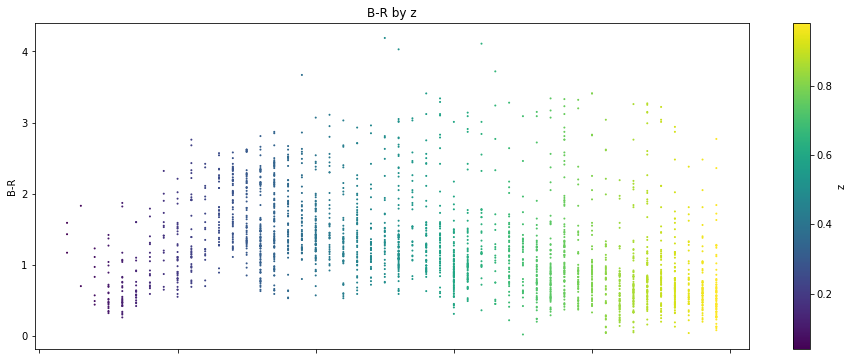

In [12]:
###  Kommentar
Mit höherer Rotverschiebung der Anteil an jungen, massereichen Sternen zunimmt, damit nimmt der Anteil im B-Band überproportional zu

### Binning by counts by z-group cut at 0.4 and 0.7

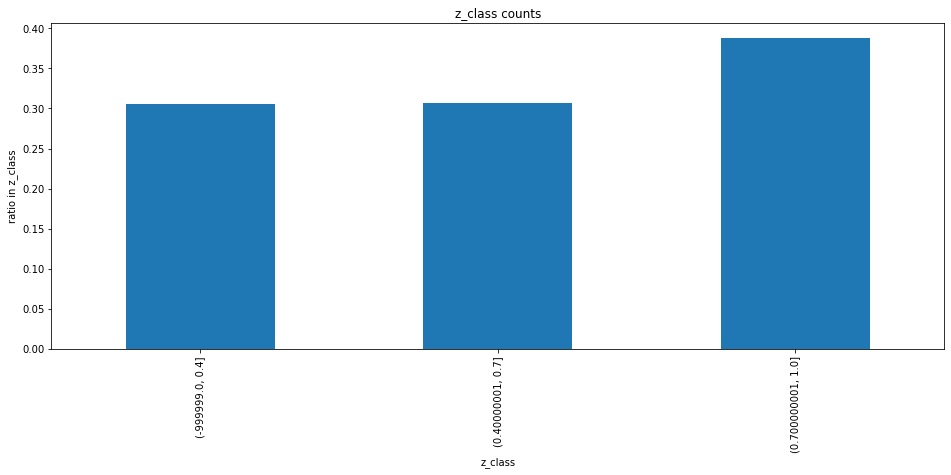

In [13]:
z_class_ratios.plot.bar(figsize=(16, 6), title="z_class counts")
plt.ylabel("ratio in z_class")
plt.show()

###  Kommentar
Mit höherer Rotverschiebung der Anteil an jungen, massereichen Sternen zunimmt, damit nimmt der Anteil im B-Band überproportional zu